# Using categorical counts

In [1]:
import colorcet as cc
import datashader as ds
import datashader.transfer_functions as tf
import pandas as pd

## 1. Read data from parquet file into pandas DataFrame

In [2]:
#df = pd.read_parquet("parq")
df = pd.read_parquet("parq/wales.parq")
df

,x,y,area_code,highest_qualification,ethnic_group
0,249077.046875,363322.50000,W00000295,other,asian
1,249223.125000,363239.31250,W00000295,none,white
2,249301.000000,363353.15625,W00000295,other,white
3,249202.578125,363367.31250,W00000295,level2,white
4,249131.140625,363320.09375,W00000295,level4,white
...,...,...,...,...,...
3063451,257583.921875,362992.31250,W00000322,other,white
3063452,257587.984375,363063.00000,W00000322,other,white
3063453,257919.312500,363093.87500,W00000322,level2,white
3063454,257624.062500,362975.68750,W00000322,level2,white


## 2. Highest qualification column

In [3]:
df.groupby("highest_qualification").size()

highest_qualification
other     763890
none      650517
level1    332943
level2    393819
level3    308171
level4    614116
dtype: int64

## 3. Height and width of image using correct aspect ratio

In [4]:
height = 750
aspect = (df.x.max() - df.x.min()) / (df.y.max() - df.y.min())
width = int(height*aspect)

## 4. Calculate counts per pixel for each category

In [5]:
cvs = ds.Canvas(width, height)
counts = cvs.points(df, "x", "y", ds.by("highest_qualification"))
type(counts), counts.shape, counts.dtype, counts.min().item(), counts.max().item()

(xarray.core.dataarray.DataArray, (750, 633, 6), dtype('uint32'), 0, 1054)

## 5. Apply colours to obtain an image

### Colours are Paul Tol's discrete rainbow colour scheme (https://personal.sron.nl/~pault/) with 5 colours: dark blue, light blue, green, yellow, red

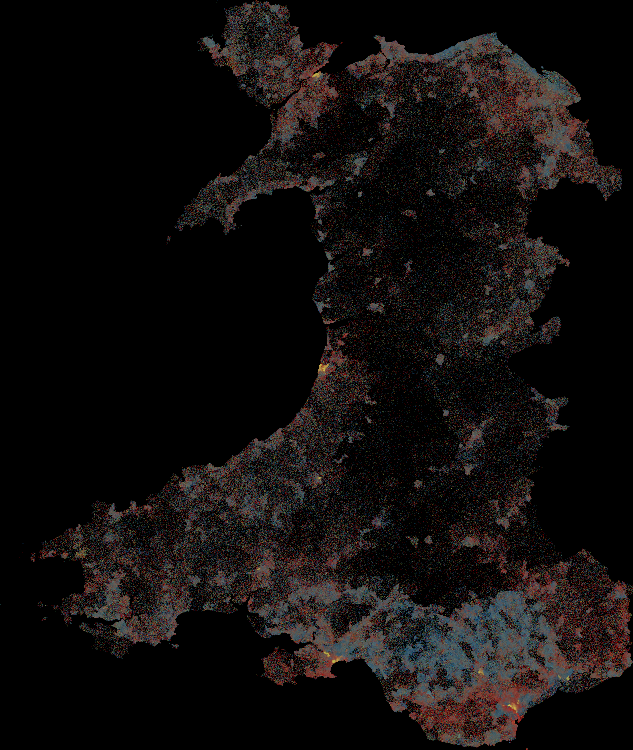

In [6]:
color_key = {"none": "#1965B0", "level1": "#7BAFDE", "level2": "#4EB265", "level3": "#F7F056",
             "level4": "#DC050C", "other": "black"}
im = tf.shade(counts, how="eq_hist", color_key=color_key)
tf.set_background(im, "black")

## Datashader creates static images.
## Would be nice to be able to zoom and pan, and have a legend.